In [35]:
# import all the required libraries
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Balanced_7200.csv")

In [36]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

10206

In [37]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [38]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'love': 1250,
         'joy': 1250,
         'surprise': 1250,
         'sadness': 1250,
         'fear': 1250,
         'anger': 1250})

In [39]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [40]:
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [41]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [42]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [43]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [44]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [45]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [46]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulties parents child b...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [47]:
st = SnowballStemmer("english")
df['content'] = df['content'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['content'].head()

0    mayb smaller compar peopl face realli taught f...
1    friend mine often difficulti parent child bett...
2                      absolut love feel accept weight
3                              actual feel anyth shock
4    actual feel strang return way felt earli twent...
Name: content, dtype: object

In [48]:
x = df.content
y = df.Emot

In [25]:

SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [26]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))

Train set has total 5250 entries with 17.12% sadness, 16.38% joy, 16.82% love, 16.42% anger, 16.70% fear, 16.55% surprise
Test set has total 2250 entries with 15.60% sadness, 17.33% joy, 16.31% love, 17.24% anger, 16.58% fear , 16.93% surprise


In [27]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [28]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [29]:

def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [30]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [31]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [54]:
def classifivation_report(mf, ng, spl):
    ug_cvec = CountVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [49]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [50]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

5829

In [51]:
cvec = CountVectorizer()
n_features = np.arange(1500,6001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


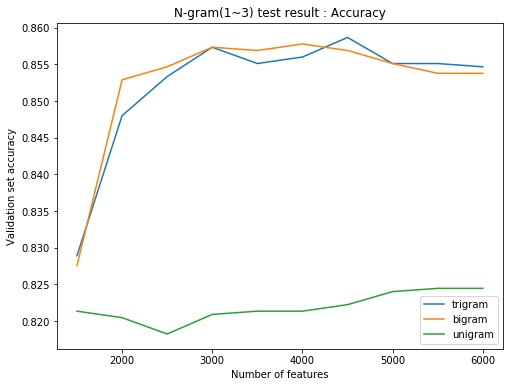

In [52]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [55]:
mf_ = 4500
ng_ = (1,3)
spl_ = 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 85.87%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       302   19     6     10     8         6
joy            17  314    38      5    10         6
love           13   24   324      2     1         3
anger          29   12    12    319    15         1
fear           12    8     2     13   308        30
surprise        0    4     2      2     8       365
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.91      0.82      0.86       388
         joy       0.88      0.83      0.85       373
        love       0.82      0.81      0.81       390
       anger       0.84      0.88      0.86       367
        fear       0.81      0.86      0.83       351
    surprise       0.89      0.96      0.92       381

   micro avg       0.86      0

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


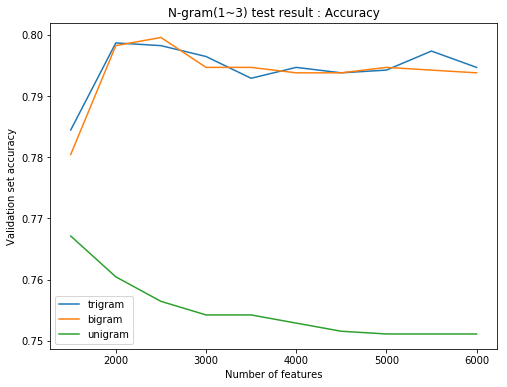

In [56]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [57]:
mf_ = 2500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 79.96%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       267   16    19     13    21        15
joy            21  270    54     12    17        16
love            9   28   314      6     6         4
anger          30   12    24    294    20         8
fear           14    4     8     18   300        29
surprise        3    9     2      3    10       354
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.85      0.76      0.80       388
         joy       0.80      0.80      0.80       373
        love       0.80      0.69      0.74       390
       anger       0.75      0.86      0.80       367
        fear       0.78      0.76      0.77       351
    surprise       0.83      0.93      0.88       381

   micro avg       0.80      0

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# ug_cvec = CountVectorizer(max_features=70000, ngram_range=(1, 3))
# ug_pipeline = Pipeline([
#         ('vectorizer', ug_cvec),
#         ('classifier', cls)
#     ])
# train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


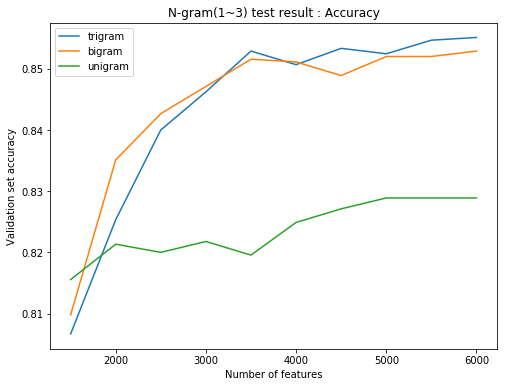

In [58]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [59]:
mf_ = 5500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 85.47%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       305   15     6      9    10         6
joy            15  311    39      5     9        11
love           13   30   320      1     1         2
anger          26   12     9    327    12         2
fear           12   12     1     13   307        28
surprise        0    5     3      2    18       353
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.92      0.84      0.88       388
         joy       0.86      0.82      0.84       373
        love       0.81      0.80      0.80       390
       anger       0.85      0.87      0.86       367
        fear       0.82      0.87      0.84       351
    surprise       0.88      0.93      0.90       381

   micro avg       0.85      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


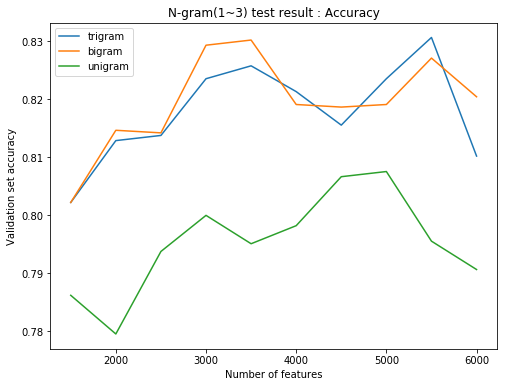

In [60]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [61]:
mf_ = 5500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 81.42%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       292   11    10      6    17        15
joy            38  248    55      6    21        22
love           19   13   326      1     5         3
anger          41    9    19    283    22        14
fear           13    5     3      4   317        31
surprise        2    3     2      1     7       366
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.94      0.73      0.82       388
         joy       0.81      0.85      0.83       373
        love       0.86      0.64      0.73       390
       anger       0.79      0.89      0.83       367
        fear       0.72      0.83      0.77       351
    surprise       0.81      0.96      0.88       381

   micro avg       0.81      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8346666666666667
0.8466666666666667
0.836
0.844
0.8506666666666667
0.848
0.8186666666666667
0.8426666666666667
0.828
0.8253333333333334
Avg Accuracy 0.8374666666666666


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


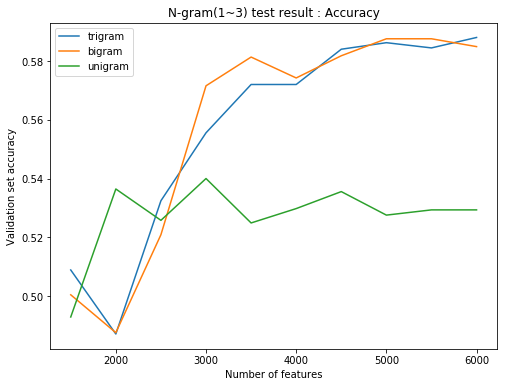

In [62]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [63]:
mf_ = 5000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 58.76%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       165   72    18     63    21        12
joy            58  206    32     61    20        13
love           49   63   199     41     8         7
anger          37   39    16    275     9        12
fear           29   33     6     68   202        35
surprise       17   19    15     37    18       275
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.50      0.71      0.59       388
         joy       0.73      0.54      0.62       373
        love       0.48      0.53      0.50       390
       anger       0.70      0.54      0.61       367
        fear       0.46      0.47      0.47       351
    surprise       0.78      0.72      0.75       381

   micro avg       0.59      0

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


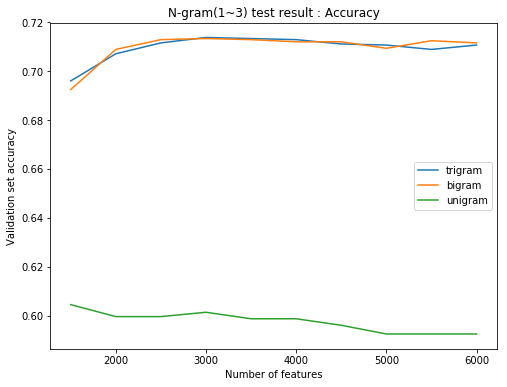

In [64]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [65]:
mf_ = 5500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 71.24%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       283   27    15     10     8         8
joy            78  241    42     11    11         7
love           59   53   239      9     4         3
anger          80   24    23    237    23         1
fear           58   26     8     10   239        32
surprise        7    4     3      2     1       364
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.85      0.61      0.71       388
         joy       0.84      0.64      0.73       373
        love       0.64      0.62      0.63       390
       anger       0.72      0.65      0.69       367
        fear       0.50      0.81      0.62       351
    surprise       0.88      0.96      0.91       381

   micro avg       0.71      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


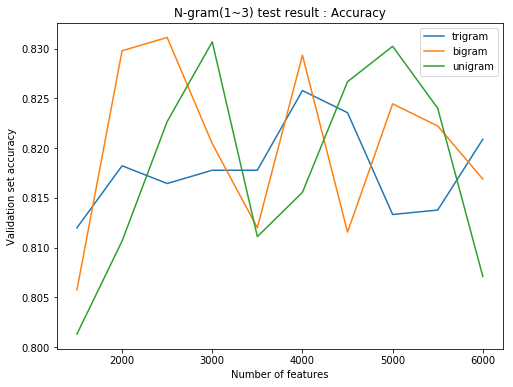

In [66]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [67]:
mf_ = 2500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 81.51%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       248   44    17     24    12         6
joy            27  279    51     14    11         8
love            4   30   323      1     6         3
anger          12   11    15    334    13         3
fear            5    4     6     25   306        27
surprise        4    0     3      3    27       344
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.83      0.86      0.85       388
         joy       0.82      0.82      0.82       373
        love       0.76      0.72      0.74       390
       anger       0.78      0.88      0.83       367
        fear       0.83      0.71      0.76       351
    surprise       0.88      0.90      0.89       381

   micro avg       0.82      0